In [3]:
from datetime import datetime, timedelta
from datetime import date

import glob
import os

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import pandas as pd

import stock_research as sr


In [4]:
start_date = datetime(2022, 5, 1)
end_date = datetime(2022, 5, 13)
sdate = start_date.strftime('%Y%m%d')
edate = end_date.strftime('%Y%m%d')
date = '2022-03-30'
SUMMARY_TYPE = 2
params = {'date': date, 'type': SUMMARY_TYPE}
EDINET_API_URL = "https://disclosure.edinet-fsa.go.jp/api/v1"
orignal_data_path = '../warehouse/stock/original_data/'

In [5]:
print(f'start_date:{start_date}')
print(f'end_date:{end_date}')
print(f'sdate:{sdate}')
print(f'edate:{edate}')
print(f'date:{date}')
print(f'SUMMARY_TYPE:{SUMMARY_TYPE}')
print(f'params:{params}')

start_date:2022-05-01 00:00:00
end_date:2022-05-13 00:00:00
sdate:20220501
edate:20220513
date:2022-03-30
SUMMARY_TYPE:2
params:{'date': '2022-03-30', 'type': 2}


In [6]:
# doc_summary = sr.get_submitted_summary(params,EDINET_API_URL)
# df_doc_summary = pd.DataFrame(doc_summary['results'])

In [7]:
doc_type_code=['120']
SUMMARY_TYPE = 2
start_date = datetime(2022, 4, 1)
end_date = datetime(2022, 4, 30)
for i, date in enumerate(sr.date_range(start_date, end_date)):
    date_str = str(date)[:10]
    df_doc_summary = sr.download_all_documents(date_str, orignal_data_path, EDINET_API_URL,
                                                   SUMMARY_TYPE, doc_type_code)
    if i == 0:
        df_doc_summary_all = df_doc_summary.copy()
    else:
        df_doc_summary_all = pd.concat([df_doc_summary_all, df_doc_summary])
    print(date_str,df_doc_summary_all.shape)


https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-04-01 (17, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-04-02 (17, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-04-03 (17, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-04-04 (29, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-04-05 (37, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-04-06 (41, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-04-07 (55, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-04-08 (126, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-04-09 (126, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-04-10 (126, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-04-11 (177, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-04-12 (189, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2

In [9]:
files = glob.glob(orignal_data_path+'*')
for file in files:
    print(file)

../warehouse/stock/original_data\2022-03-30
../warehouse/stock/original_data\2022-03-31
../warehouse/stock/original_data\2022-04-01
../warehouse/stock/original_data\2022-04-04
../warehouse/stock/original_data\2022-04-05
../warehouse/stock/original_data\2022-04-06
../warehouse/stock/original_data\2022-04-07
../warehouse/stock/original_data\2022-04-08
../warehouse/stock/original_data\2022-04-11
../warehouse/stock/original_data\2022-04-12
../warehouse/stock/original_data\2022-04-13
../warehouse/stock/original_data\2022-04-14
../warehouse/stock/original_data\2022-04-15
../warehouse/stock/original_data\2022-04-18
../warehouse/stock/original_data\2022-04-19
../warehouse/stock/original_data\2022-04-20
../warehouse/stock/original_data\2022-04-21
../warehouse/stock/original_data\2022-04-22
../warehouse/stock/original_data\2022-04-25
../warehouse/stock/original_data\2022-04-26
../warehouse/stock/original_data\2022-04-27
../warehouse/stock/original_data\2022-04-28
../warehouse/stock/original_data

In [17]:
start_date = datetime(2022, 3, 30)
end_date = datetime(2022, 4, 28)
sdate = start_date.strftime('%Y%m%d')
edate = end_date.strftime('%Y%m%d')
i = -1
csv_name = f'submitted_doc_list_{sdate}_{edate}.csv'
save_path = '../warehouse/stock/created/'
for date in sr.date_range(start_date, end_date):
    date_str = str(date)[:10]
    tmppath = save_path + date_str + '/doc_summary.csv'
    if os.path.exists(tmppath):
        i+=1
        df_doc_summary = pd.read_csv(orignal_data_path + date_str + '/doc_summary.csv')
        if i == 0:
            df_doc_summary_all = df_doc_summary.copy()
        else:
            df_doc_summary_all = pd.concat([df_doc_summary_all, df_doc_summary])
        print(date_str,df_doc_summary_all.shape)
df_doc_summary_all.to_csv(save_path+csv_name,index=False)   
df_doc_summary_all = pd.read_csv(save_path+csv_name)
df_doc_summary_all.drop('Unnamed: 0',axis=1).to_csv(save_path+csv_name,index=False)        

In [ ]:
df_doc_summary_all = pd.read_csv(save_path+csv_name)
df_doc_summary_all

,seqNumber,docID,edinetCode,secCode,JCN,filerName,fundCode,ordinanceCode,formCode,docTypeCode,periodStart,periodEnd,submitDateTime,docDescription,issuerEdinetCode,subjectEdinetCode,subsidiaryEdinetCode,currentReportReason,parentDocID,opeDateTime,withdrawalStatus,docInfoEditStatus,disclosureStatus,xbrlFlag,pdfFlag,attachDocFlag,englishDocFlag
0,1,S100NRTC,E04730,NaN,7.140001e+12,株式会社サイプレスクラブ,NaN,10,030000,120,2021-01-01,2021-12-31,2022-03-30 09:00,有価証券報告書－第34期(令和3年1月1日－令和3年12月31日),NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,1,1,0
1,11,S100NJSH,E12460,NaN,7.010001e+12,野村アセットマネジメント株式会社,G04618,30,07A000,120,2021-07-13,2022-01-11,2022-03-30 09:02,有価証券報告書（内国投資信託受益証券）－第33期(令和3年7月13日－令和4年1月11日),NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,1,1,0
2,54,S100NQFZ,E02797,74250.0,2.180001e+12,初穂商事株式会社,NaN,10,030000,120,2021-01-01,2021-12-31,2022-03-30 09:27,有価証券報告書－第64期(令和3年1月1日－令和3年12月31日),NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,1,1,0
3,62,S100NS8Y,E04724,NaN,2.060001e+12,株式会社宇都宮ゴルフクラブ,NaN,10,030000,120,2021-01-01,2021-12-31,2022-03-30 09:44,有価証券報告書－第62期(令和3年1月1日－令和3年12月31日),NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,1,1,0
4,63,S100NRYI,E02679,80400.0,8.010401e+12,株式会社東京ソワール,NaN,10,030000,120,2021-01-01,2021-12-31,2022-03-30 09:47,有価証券報告書－第53期(令和3年1月1日－令和3年12月31日),NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,422,S100NYYX,E34869,NaN,NaN,イーベイ・インク,NaN,10,082000,120,2021-01-01,2021-12-31,2022-04-28 15:48,外国会社報告書,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,1
1032,429,S100NYT9,E05921,NaN,NaN,マーシュ・アンド・マクレナン・カンパニーズ・インク,NaN,10,082000,120,2021-01-01,2021-12-31,2022-04-28 15:56,外国会社報告書,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,1
1033,448,S100NZ0X,E05762,NaN,NaN,バークレイズ・ピーエルシー,NaN,10,082000,120,2021-01-01,2021-12-31,2022-04-28 16:25,外国会社報告書,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,1
1034,460,S100NYV2,E05982,NaN,NaN,バークレイズ・バンク・ピーエルシー,NaN,10,082000,120,2021-01-01,2021-12-31,2022-04-28 16:46,外国会社報告書,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,1


In [23]:
stock_code_list_path = '../warehouse/stock//original_data/stock_code_list/data_j(202204_last).csv'
stock_code_list = pd.read_csv(stock_code_list_path)[['コード','銘柄名']]
df_doc_summary_all = pd.read_csv(save_path+csv_name)
df_doc_summary_all['コード'] = 0
col_1 = 5
col_2 = 27
print(df_doc_summary_all.columns[col_1])
print(df_doc_summary_all.columns[col_2])

for i in range(len(df_doc_summary_all)):
    if i % 100 ==0: print(f'{i}/{len(df_doc_summary_all)}')
    for j, code_list in stock_code_list.iterrows():
        if (df_doc_summary_all.iloc[i,col_1] == (code_list['銘柄名']+'株式会社')) or (df_doc_summary_all.iloc[i,6] == ('株式会社'+code_list['銘柄名'])):
            # print(df_doc_summary_all.iloc[i,col_1])
            # print(code_list['コード'])
            df_doc_summary_all.iloc[i,col_2] = code_list['コード']


filerName
コード
0/1036
100/1036
200/1036
300/1036
400/1036
500/1036
600/1036
700/1036
800/1036
900/1036
1000/1036


In [24]:
csv_name = f'submitted_doc_list_only_stock_{sdate}_{edate}.csv'
save_path = '../warehouse/stock/created/'
mask = df_doc_summary_all['コード']!=0
df_doc_summary_all[mask].to_csv(save_path+csv_name,index=False)

In [25]:
df_doc_summary_all = pd.read_csv(save_path+csv_name)
df_doc_summary_all

,seqNumber,docID,edinetCode,secCode,JCN,filerName,fundCode,ordinanceCode,formCode,docTypeCode,periodStart,periodEnd,submitDateTime,docDescription,issuerEdinetCode,subjectEdinetCode,subsidiaryEdinetCode,currentReportReason,parentDocID,opeDateTime,withdrawalStatus,docInfoEditStatus,disclosureStatus,xbrlFlag,pdfFlag,attachDocFlag,englishDocFlag,コード
0,54,S100NQFZ,E02797,74250.0,2.180001e+12,初穂商事株式会社,NaN,10,30000,120,2021-01-01,2021-12-31,2022-03-30 09:27,有価証券報告書－第64期(令和3年1月1日－令和3年12月31日),NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,1,1,0,7425
1,70,S100NS91,E04011,89140.0,4.010001e+12,エリアリンク株式会社,NaN,10,30000,120,2021-01-01,2021-12-31,2022-03-30 09:57,有価証券報告書－第27期(令和3年1月1日－令和3年12月31日),NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,1,1,0,8914
2,79,S100NQN7,E04783,81790.0,2.290001e+12,ロイヤルホールディングス株式会社,NaN,10,30000,120,2021-01-01,2021-12-31,2022-03-30 10:03,有価証券報告書－第73期(令和3年1月1日－令和3年12月31日),NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,1,1,0,8179
3,91,S100NROR,E00664,39440.0,6.120001e+12,古林紙工株式会社,NaN,10,30000,120,2021-01-01,2021-12-31,2022-03-30 10:22,有価証券報告書－第92期(令和3年1月1日－令和3年12月31日),NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,1,1,0,3944
4,103,S100NRUO,E00708,39480.0,5.010101e+12,光ビジネスフォーム株式会社,NaN,10,30000,120,2021-01-01,2021-12-31,2022-03-30 10:36,有価証券報告書－第54期(令和3年1月1日－令和3年12月31日),NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,1,1,0,3948
5,110,S100NSBD,E02365,79920.0,9.010601e+12,セーラー万年筆株式会社,NaN,10,30000,120,2021-01-01,2021-12-31,2022-03-30 10:40,有価証券報告書－第109期(令和3年1月1日－令和3年12月31日),NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,1,1,0,7992
6,111,S100NRQQ,E02301,77390.0,7.030001e+12,キヤノン電子株式会社,NaN,10,30000,120,2021-01-01,2021-12-31,2022-03-30 10:40,有価証券報告書－第83期(令和3年1月1日－令和3年12月31日),NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,1,1,0,7739
7,118,S100NQRC,E01028,41070.0,9.010001e+12,伊勢化学工業株式会社,NaN,10,30000,120,2021-01-01,2021-12-31,2022-03-30 10:50,有価証券報告書－第101期(令和3年1月1日－令和3年12月31日),NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,1,1,0,4107
8,131,S100NRET,E26836,60670.0,9.011001e+12,インパクトホールディングス株式会社,NaN,10,30000,120,2021-01-01,2021-12-31,2022-03-30 11:18,有価証券報告書－第18期(令和3年1月1日－令和3年12月31日),NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,1,1,0,6067
9,146,S100NRYM,E31817,61770.0,4.021001e+12,ＡｐｐＢａｎｋ株式会社,NaN,10,30000,120,2021-01-01,2021-12-31,2022-03-30 11:44,有価証券報告書－第10期(令和3年1月1日－令和3年12月31日),NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,1,1,0,6177


In [69]:

# 文書IDと提出日を取得
stock_code = 7425
doc_id = df_doc_summary_all.query(f'コード=={stock_code}').docID.values[0]
date = df_doc_summary_all.query(f'コード=={stock_code}').submitDateTime.values[0]
file_path = orignal_data_path + date[:10] + '/' + doc_id + '/XBRL/PublicDoc/*.xbrl'
file_path = glob.glob(file_path)[0]

# データを取得
sr.get_one_xbrl_data(file_path,
              key='jpcrp_cor:NetSalesSummaryOfBusinessResults', 
              context_ref='CurrentYearDuration')

C:\Users\thyt\tfgpu2\.venv\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


'29909632000'

In [70]:
date

'2022-03-30 09:27'

In [73]:
file_path = orignal_data_path + date[:10] + '/' + doc_id + '/XBRL/PublicDoc/*.xbrl'
file_path = glob.glob(file_path)[0]
account_df_path = '../warehouse/stock/created/account_df.csv'
# print(f'seccode:{seccode}')
print(f'doc_id:{doc_id}')
print(f'date:{date}')
print(f'file_path:{file_path}')
print(f'account_df_path:{account_df_path}')
account_df = pd.read_csv(account_df_path)
sr.get_xbrl_data(file_path, account_df)

doc_id:S100NQFZ
date:2022-03-30 09:27
file_path:../warehouse/stock/original_data/2022-03-30/S100NQFZ/XBRL/PublicDoc\jpcrp030000-asr-001_E02797-000_2021-12-31_01_2022-03-30.xbrl
account_df_path:../warehouse/stock/created/account_df.csv


C:\Users\thyt\tfgpu2\.venv\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


,name,prior_year,key,context_ref,value
0,net_sales_summary,4.0,jpcrp_cor:NetSalesSummaryOfBusinessResults,Prior4YearDuration,None
1,net_sales_summary,3.0,jpcrp_cor:NetSalesSummaryOfBusinessResults,Prior3YearDuration,None
2,net_sales_summary,2.0,jpcrp_cor:NetSalesSummaryOfBusinessResults,Prior2YearDuration,19449010000
3,net_sales_summary,1.0,jpcrp_cor:NetSalesSummaryOfBusinessResults,Prior1YearDuration,29056373000
4,net_sales_summary,0.0,jpcrp_cor:NetSalesSummaryOfBusinessResults,CurrentYearDuration,29909632000
5,CompanyNameCoverPage,NaN,jpcrp_cor:CompanyNameCoverPage,FilingDateInstant,初穂商事株式会社


4 2019-12-31 00:00:00
2015 12 31
2015-12-31
3 2019-12-31 00:00:00
2016 12 31
2016-12-31
2 2019-12-31 00:00:00
2017 12 31
2017-12-31
1 2019-12-31 00:00:00
2018 12 31
2018-12-31
0 2019-12-31 00:00:00
2019 12 31
2019-12-31


Text(0.5, 1.0, 'Net Sales')

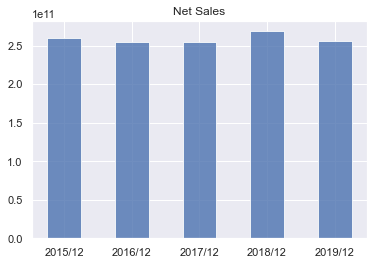

In [142]:
# 売上を取得
net_sales_summary = account_df.query('name=="net_sales_summary"').copy()
# 数値データに変換
net_sales_summary['value'] = net_sales_summary['value'].astype('float')
# x軸用に調整
years = [sr.calc_fiscal_year(prior_year, asof=datetime(2019,12,31))\
         for prior_year in net_sales_summary.prior_year]

net_sales_summary['fiscal_year'] = [str(year.year)+'/'+str(year.month) for year in years]
# 棒グラフを作成
plt.bar(net_sales_summary['fiscal_year'], net_sales_summary['value'], 
        color='b', alpha=0.8, width=0.5)
plt.title('Net Sales')